## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

In [2]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0


## Look at the histograms for the continuous variables

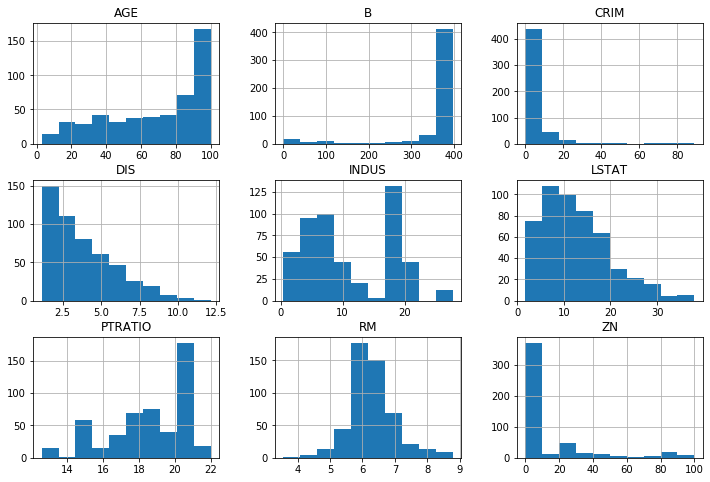

In [13]:
# Your code here
boston_features[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']].hist(figsize = (12,8))
plt.show()

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

In [14]:
# Your code here
import numpy as np

In [17]:
# create new DataFrame
data_log = pd.DataFrame([])

cols = ['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'PTRATIO']

for col in cols:
    data_log[col] = np.log(boston_features[col])

In [18]:
data_log.head()

,AGE,B,CRIM,DIS,INDUS,LSTAT,PTRATIO
0,4.177459,5.983684,-5.064036,1.408545,0.837248,1.605430,2.727853
1,4.368181,5.983684,-3.600502,1.602836,1.955860,2.212660,2.879198
2,4.112512,5.973377,-3.601235,1.602836,1.955860,1.393766,2.879198
3,3.824284,5.977949,-3.430523,1.802073,0.779325,1.078410,2.928524
4,3.992681,5.983684,-2.672924,1.802073,0.779325,1.673351,2.928524


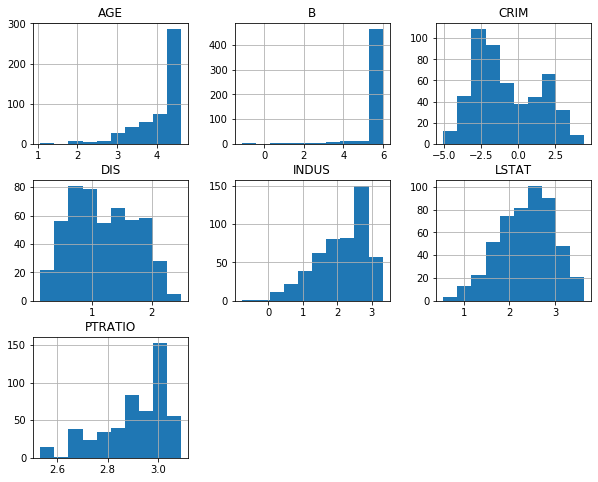

In [20]:
data_log.hist(figsize = (10,8))
plt.show()

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [22]:
# Your code here
boston_features['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [24]:
# No improvement using log
age = boston_features['AGE']
b = boston_features['B']
ptratio = boston_features['PTRATIO']

# Already normal
rm = boston_features['RM']

# Use log
crim = data_log['CRIM']
dis = data_log['DIS']
indus = data_log['INDUS']
lstat = data_log['LSTAT']

In [25]:
# Create final features

featuresfinal = pd.DataFrame([])

#Mean normalization
featuresfinal['AGE'] = (age - np.mean(age))/ (max(age) - min(age))
featuresfinal['B'] = (b - np.mean(b))/ (max(b) - min(b))
featuresfinal['PTRATIO'] = (ptratio - np.mean(ptratio))/ (max(ptratio) - min(ptratio))
featuresfinal['RM'] = (rm - np.mean(rm))/ (max(rm) - min(rm))
featuresfinal['CRIM'] = (crim - np.mean(crim))/ (max(crim) - min(crim))
featuresfinal['DIS'] = (dis - np.mean(dis))/ (max(dis) - min(dis))
featuresfinal['INDUS'] = (indus - np.mean(indus))/ (max(indus) - min(indus))
featuresfinal['LSTAT'] = (lstat - np.mean(lstat))/ (max(lstat) - min(lstat))

In [26]:
featuresfinal.head()

,AGE,B,PTRATIO,RM,CRIM,DIS,INDUS,LSTAT
0,-0.034757,0.101432,-0.335695,0.055636,-0.448432,0.092905,-0.322716,-0.247852
1,0.106335,0.101432,-0.069738,0.026129,-0.295221,0.174762,-0.049844,-0.051253
2,-0.076981,0.091169,-0.069738,0.172517,-0.295297,0.174762,-0.049844,-0.316381
3,-0.234551,0.095708,0.026007,0.136686,-0.277426,0.258703,-0.336846,-0.418482
4,-0.148042,0.101432,0.026007,0.165236,-0.198116,0.258703,-0.336846,-0.225862


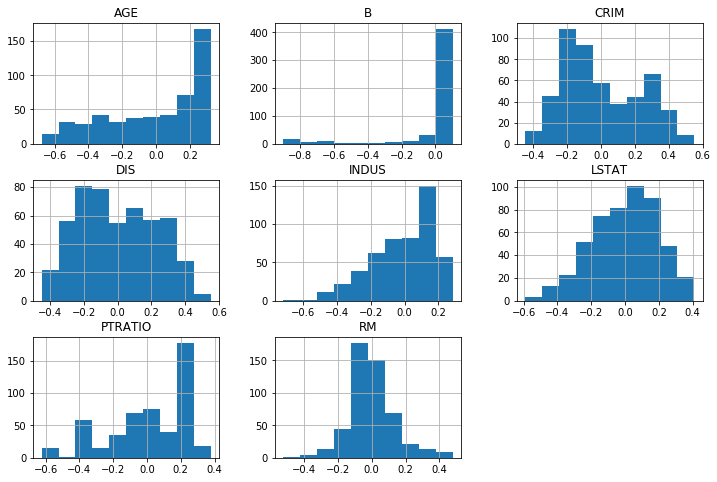

In [28]:
featuresfinal.hist(figsize = (12,8))
plt.show()

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!